<a href="https://colab.research.google.com/github/williamdavidona/MachineLearning-SupervisedLearning/blob/main/Xgboost_World_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Optimization



Name: William Ona

**Introduction:**

The restaurant industry is one of the most competitive industries out there, with countless restaurants vying for customers' attention and loyalty. In such a crowded space, it's important for restaurant owners and managers to understand what their customers want and how they can improve their operations to meet those needs. That's where data analysis comes in.

In this project, we will explore a dataset of restaurant activities and customer reviews to demonstrate how data science can be applied to common data sources. By using exploratory data analysis (EDA) techniques, we will gain insights into customer preferences, dining habits, and overall satisfaction levels. Additionally, we will apply data science techniques to this information to provide actionable recommendations for restaurant owners and managers.

Our aim is to show the value of data in the restaurant industry and to inspire others to apply data science principles to their own businesses. By leveraging the power of data, restaurant owners and managers can make informed decisions that improve their operations and ultimately lead to increased customer satisfaction and loyalty.

##Data Preprocessing



 This format is characterized by values separated by tabs, which can be easily processed using pandas functions.

In [1]:
import pandas as pd

In [2]:
Data = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')
Data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
Data.shape

(1000, 2)

In [4]:
Data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
Data.duplicated().sum()

4

In [6]:
Data= Data.drop_duplicates()

In [7]:
Data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In addition to using pandas, this project also utilizes the data visualization libraries Matplotlib and Seaborn for creating visualizations and gaining insights from the restaurant analytics data.

The line warnings.filterwarnings('ignore') is included in this project to suppress warning messages that may be generated during data analysis or visualization. This can help to improve the readability of the output and prevent distractions caused by irrelevant warnings.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
Data['Liked'].unique()

array([1, 0])

In [11]:
Data['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

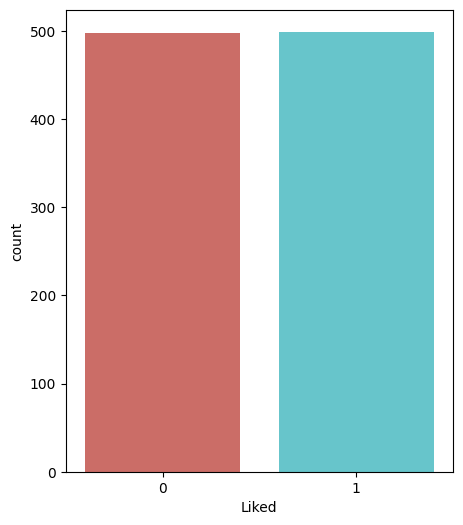

In [23]:
plt.figure(figsize=(5,6))
sns.countplot(x=Data['Liked'], data=Data,palette='hls')
plt.show()

In [24]:
balance_counts= Data.groupby('Liked')['Liked'].agg('count').values
balance_counts

array([497, 499])

Plotly is especially useful for identifying trends and patterns in the restaurant analytics data, including features that customers like or dislike. With its ability to create interactive visualizations such as scatter plots and heatmaps, Plotly enables the project to gain insights into the relationships between different features of the restaurant data and customer preferences, helping to inform future decision-making and improve the overall restaurant experience

In [25]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x=[0],y=[balance_counts[0]],name='Like',text= [balance_counts[0]],textposition ='auto',marker_color ='blue'))
fig.add_trace(go.Bar(x=[0],y=[balance_counts[1]],name='Dislike',text= [balance_counts[1]],textposition ='auto',marker_color ='red'))
fig.update_layout(title = '<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by Likes</span>')
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'marker': {'color': 'blue'},
              'name': 'Like',
              'text': [497],
              'textposition': 'auto',
              'type': 'bar',
              'x': [0],
              'y': [497]},
             {'marker': {'color': 'red'},
              'name': 'Dislike',
              'text': [499],
              'textposition': 'auto',
              'type': 'bar',
              'x': [0],
              'y': [499]}],
    'layout': {'template': '...',
               'title': {'text': ('<span style="font-size:32px; f' ... 't distribution by Likes</span>')}}
})>

Lambda functions are applied to manipulate data elements on a per-row basis, while the split method is used to extract specific values from columns that contain multiple pieces of information. These techniques enable the project to transform the raw data into a more usable format, facilitating deeper analysis and visualization.

In [27]:
Data['Review_Length'] = Data['Review'].apply(lambda x: len(x.split(' ')))
Data['Review_Length']

0       4
1       4
2       8
3      15
4      12
       ..
995    12
996     3
997    10
998    16
999    28
Name: Review_Length, Length: 996, dtype: int64

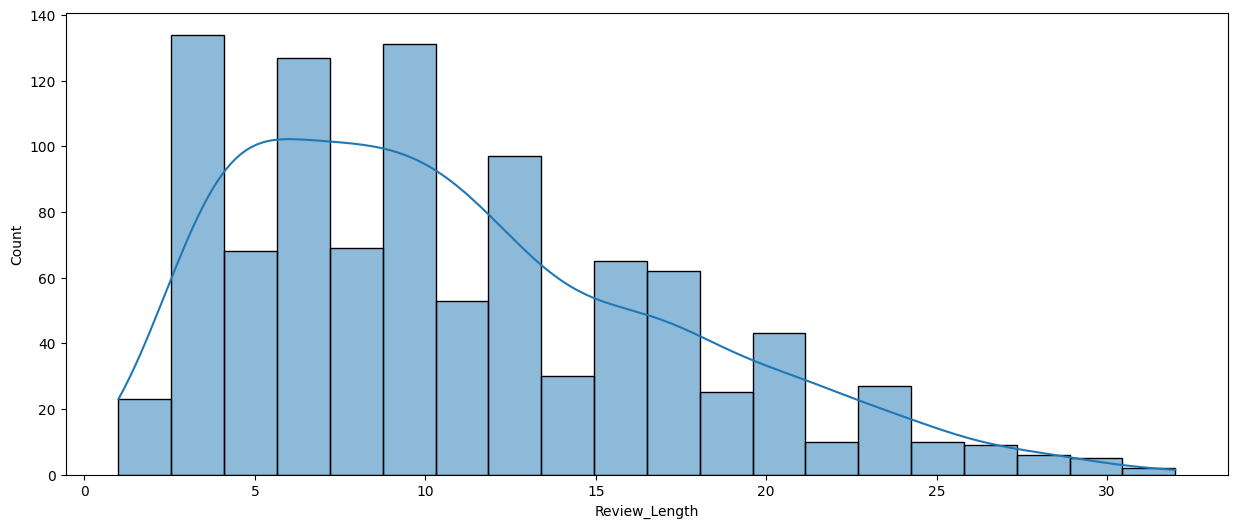

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(Data['Review_Length'],bins=20, kde= True, palette = 'hls')
plt.show()

As part of the analysis, the project uses data visualization techniques to illustrate the distribution of review length for both positive and negative reviews, as well as to count the number of occurrences for each value. This information can provide valuable insights into the sentiment of customer reviews and the factors that contribute to positive or negative experiences

In [34]:
like_df = Data[Data['Liked'] == 0]['Review_Length'].value_counts().sort_index()
dislike_df = Data[Data['Liked'] == 1]['Review_Length'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=like_df.index, y=like_df.values, name= 0, fill='tozeroy', marker_color= 'blue',))
fig.add_trace(go.Scatter(x=dislike_df.index, y=dislike_df.values, name=1, fill='tozeroy', marker_color= 'red',))
fig.update_layout(title='<span style="font-size:32px; font-family:Times New Roman">Data Distribution in Different Fields</span>')
fig.update_xaxes(range=[0, 40])
fig.show()

In [36]:
Data.head()

,Review,Liked,Review_Length
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12


In [37]:
Data.Review_Length.describe()

count    996.000000
mean      10.919679
std        6.256621
min        1.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       32.000000
Name: Review_Length, dtype: float64

In [38]:
Data_new = Data.copy()

In order to avoid confusion during data analysis, the project applies text preprocessing techniques to remove punctuation from the text data. This helps to standardize the data and eliminate potential inconsistencies caused by variations in punctuation usage. The resulting clean text data can be more easily analyzed and visualized, facilitating deeper insights into customer sentiment and preferences

In [39]:
def clean_line(line):
    line = line.lower()
    return line.strip()

In [40]:
Data_new.message = Data_new.Review.apply( lambda x:clean_line(x))
Data_new.message 

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 996, dtype: object

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def delete_punctuation(line):
    no_punctuation = ''.join([i for i in line if i not in string.punctuation])
    return no_punctuation
Data_new['Review']= Data_new['Review'].apply(lambda x:delete_punctuation(x))

The project leverages the 're' module to assist in the tokenization of lines of text. The 're' module provides regular expression functions that enable the identification and extraction of specific patterns of text, making it useful for text preprocessing tasks such as tokenization. By utilizing the 're' module, the project can effectively split lines of text into individual tokens, which can then be analyzed and processed further as needed

In [45]:
import re
def tokenization(line):
    tokens = re.split('W+',line)
    return tokens
Data_new['Review']= Data_new['Review'].apply(lambda x:tokenization(x))

In [46]:
Data_new.head()

,Review,Liked,Review_Length
0,"[, ow Loved this place]",1,4
1,[Crust is not good],0,4
2,[Not tasty and the texture was just nasty],0,8
3,[Stopped by during the late May bank holiday o...,1,15
4,[The selection on the menu was great and so we...,1,12


NLTK stands for Natural Language Toolkit, which is a popular open-source library for working with human language data in Python. It provides a suite of tools and methods for tasks such as text preprocessing, tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, and more. NLTK is widely used in natural language processing research and industry applications, and is a valuable resource for anyone working with text data in Python. By importing NLTK, users can gain access to a wide range of powerful text analysis tools and functions.

In [47]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NLTK stands for Natural Language Toolkit, which is a popular open-source library for working with human language data in Python. It provides a suite of tools and methods for tasks such as text preprocessing, tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, and more. NLTK is widely used in natural language processing research and industry applications, and is a valuable resource for anyone working with text data in Python. By importing NLTK, users can gain access to a wide range of powerful text analysis tools and functions


In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
stopwords = nltk.corpus.stopwords.words('english')

In [50]:
def delete_stopwords(line):
    salida = ''.join(i for i in line if i not in stopwords)
    return salida

In [51]:
Data_new['Review']= Data_new['Review'].apply(lambda x:delete_stopwords(x))

The PorterStemmer is a popular stemming algorithm that removes the suffixes from words in order to reduce them to their root form. By importing the PorterStemmer module, users can utilize the Porter stemming algorithm to preprocess text data and reduce the dimensionality of the feature space, which can improve the accuracy and efficiency of downstream natural language processing tasks.

In [52]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [53]:
def stemming(line):
    stem_text = ''.join([porter_stemmer.stem(word) for word in line])
    return stem_text


In [54]:
Data_new['Review']=Data_new['Review'].apply(lambda x: stemming(x))

In [55]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

The WordNetLemmatizer is a popular lemmatization algorithm that reduces words to their base or dictionary form, known as the lemma. Lemmatization is similar to stemming but aims to produce a more accurate base form of a word by considering its part of speech and context. By importing the WordNetLemmatizer module, users can utilize the WordNet lemmatization algorithm to preprocess text data and further standardize the feature space, which can improve the accuracy of natural language processing tasks such as text classification or sentiment analysis.

In [56]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [57]:
def lemmatizer(line):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in line])
    return lemm_text
Data_new['Review']=Data_new['Review'].apply(lambda x:lemmatizer(x))

In [58]:
def clean_text(line):
    line = re.sub('\[.*\]','', line).strip() # Remove text in square brackets
    line = re.sub('\S*\d\S*\s*','', line).strip()  # Remove words containing numbers
    return line.strip()

In [59]:
Data_new['Review'] = Data_new.Review.apply(lambda x: clean_text(x))

In [60]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 74.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019122 sha256=f057150a2f6014e90d39cc4016dbb029a63f17c75e4f06c828a3d043f4ed300d
  Stored in directory: /root/.cache/pip/wheels/f9/7e/12/0c885b1d01a93f5cfff2e269634078c488729f52129c8f7bde
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0


In [62]:
!python3 -m spacy download en_core_web_sm

2023-05-04 13:09:55.186481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 13:09:56.498007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


spacy provides a wide range of tools and functionality for tasks such as tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more. It also offers pre-trained models for a variety of languages, making it a valuable resource for text analysis tasks across multiple languages. By importing spacy, users can leverage its powerful functionality to preprocess and analyze text data, extract insights, and build powerful natural language processing models.

In [63]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [64]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(line):
    doc = nlp(line)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [65]:
Data_new['Review'] =  Data_new.Review.apply(lambda x: lemmatizer(x))

In [66]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [67]:
Data_new['Review'] = Data_new.Review.apply(lambda x: remove_urls(x))

In [68]:
def remove_digits(line):
    clean_line = re.sub(r"\b[0-9]+\b\s*", "", line)
    return(line)

In [69]:
Data_new['Review'] = Data_new.Review.apply(lambda x: remove_digits(x))

In [70]:
def remove_digits1(sample_text):
    clean_line = " ".join([w for w in sample_text.split() if not w.isdigit()]) # Side effect: removes extra spaces
    return(clean_line)

In [71]:
Data_new['Review'] = Data_new.Review.apply(lambda x: remove_digits1(x))

In [72]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [73]:
Data_new['Review'] = Data_new.Review.apply(lambda x: remove_emojis(x))

In [74]:
Data_new

,Review,Liked,Review_Length
0,ow love place,1,4
1,crust good,0,4
2,tasty texture nasty,0,8
3,stop late bank holiday rick steve recommendati...,1,15
4,selection menu great price,1,12
...,...,...,...
995,think food flavor texture lack,0,12
996,appetite instantly go,0,3
997,overall impressed,0,10
998,experience underwhelming think ninja sushi time,0,16


PIL is a library that adds support for opening, manipulating, and saving many different image file formats in Python

The wordcloud library provides a range of tools and options for customizing the appearance and layout of word clouds, such as adjusting the font size, color scheme, and shape of the cloud. By importing the wordcloud library, users can generate and visualize word clouds from text data, which can be useful in tasks such as text summarization, sentiment analysis, and topic modeling.

In [75]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
import numpy as np

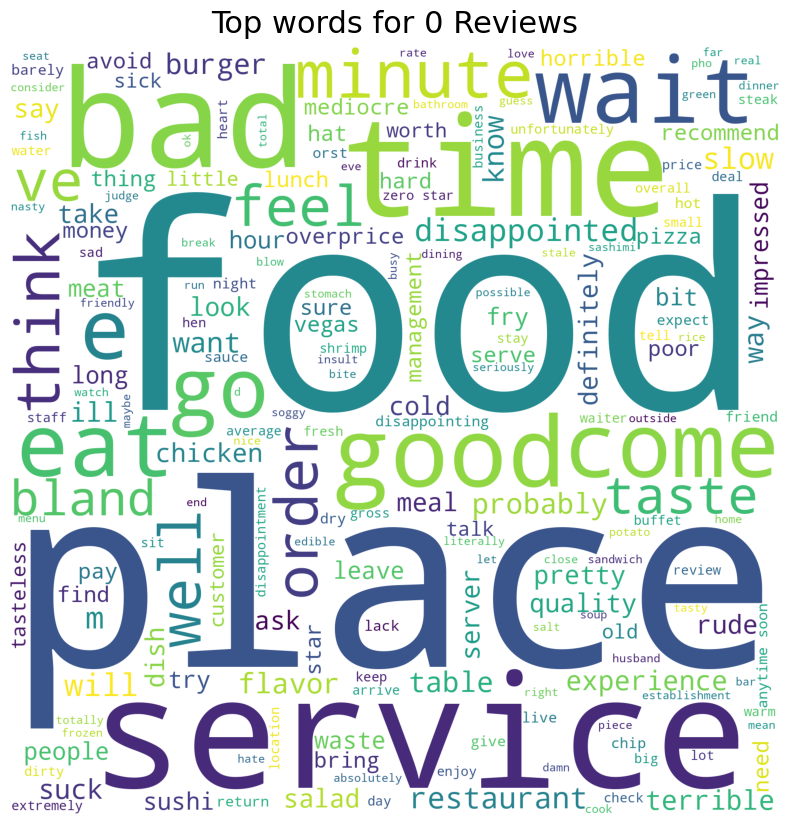

In [77]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(line for line in Data_new.loc[Data_new['Liked'] == 0, 'Review']))
plt.figure(figsize=(18,10))
plt.title('Top words for 0 Reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

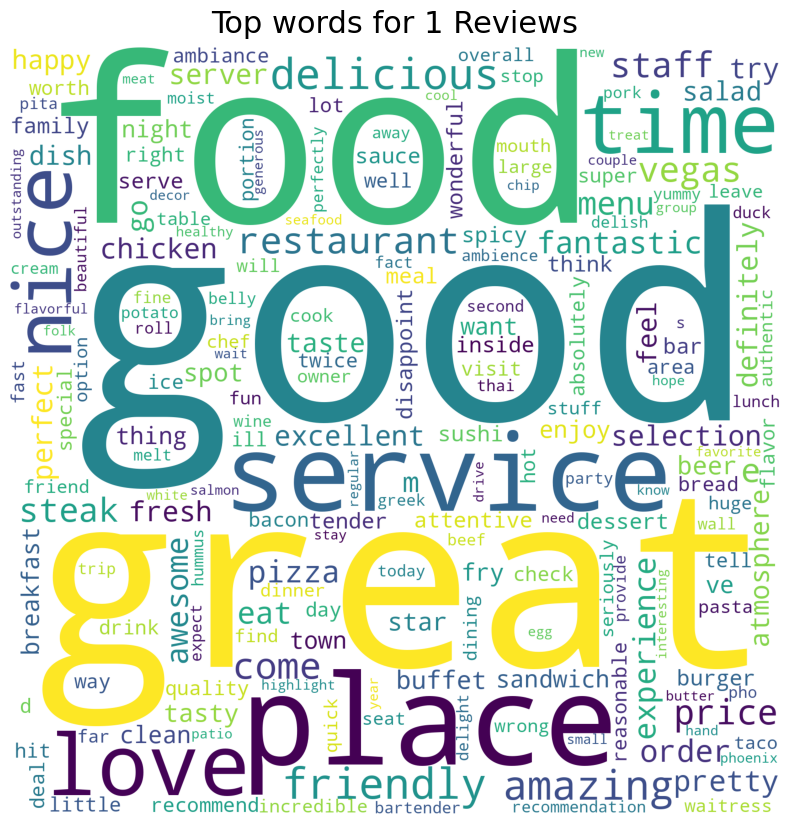

In [79]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in Data_new.loc[Data_new['Liked'] == 1, 'Review']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1 Reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [80]:
x = Data_new['Review']
y = Data_new['Liked']

print(len(x), len(y))

996 996


Great! Separating your data into train and test sets is a common practice in machine learning to evaluate the performance of your model on new, unseen data.

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

747 747
249 249


CountVectorizer is a text preprocessing technique that converts a collection of text documents into a matrix of token counts. This technique is commonly used in natural language processing (NLP) and machine learning for tasks such as text classification and sentiment analysis.

TfidfTransformer is a text preprocessing technique that stands for "Term Frequency-Inverse Document Frequency Transformer". It is used to convert a matrix of token counts (such as one produced by CountVectorizer) into a matrix of normalized term frequencies.

The basic idea behind TfidfTransformer is to weigh the importance of each term in each document based on its frequency in the document and its frequency in the corpus as a whole. Terms that are frequent in a document but rare in the corpus are considered more important, while terms that are frequent in the corpus but rare in the document are considered less important.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

MultinomialNB is a classification algorithm that is commonly used in natural language processing tasks. It is a variant of Naive Bayes that is specifically designed for text data, where the features are typically word counts or other measures of term frequency.

To use MultinomialNB, you will first need to prepare your data by converting the raw text into a numerical representation. This can be done using techniques such as CountVectorizer or TfidfVectorizer from the sklearn.feature_extraction.text module. Once your data is in the right format, you can create a MultinomialNB object and call its fit method to train the classifier on your training data. Then, you can call its predict method to make predictions on new data.

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [85]:
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)

accuracy_score is a function that takes in two arrays, one containing the true labels for a set of data points and another containing the predicted labels for the same set of data points. It then calculates the proportion of data points for which the predicted label matches the true label, and returns this value as a floating-point number between 0 and 1. The higher the accuracy score, the better the performance of the classifier.

confusion_matrix is a function that takes in the same two arrays as accuracy_score, and returns a matrix that shows the number of data points that were correctly classified and incorrectly classified for each class. The matrix has dimensions equal to the number of classes in the problem, and the diagonal elements represent the number of data points that were correctly classified for each class. The off-diagonal elements represent the number of data points that were misclassified, and can give you insight into which classes are being confused with each other.

The function then calculates various metrics such as precision, recall, and F1 score for each label in the problem, as well as macro-averaged and weighted-averaged metrics across all labels. These metrics can give you a more detailed understanding of the performance of the classifier beyond just accuracy and confusion matrix.

Precision is the proportion of true positive predictions out of all positive predictions. Recall is the proportion of true positive predictions out of all actual positive instances. The F1 score is a weighted average of precision and recall that takes both metrics into account.

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
print(accuracy_score(y_test, y_pred_class))

0.7670682730923695


In [88]:
print(confusion_matrix(y_test, y_pred_class))

[[101  31]
 [ 27  90]]


In [89]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       132
           1       0.74      0.77      0.76       117

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



The pipeline is a way to simplify your code and make it more efficient. It combines several steps of the machine learning process into one. In this case, you are first transforming the raw text data into a numerical representation using the countvectorizer, which converts each review into a bag of words.

Then, the TfidfTransformer is applied to the output of the countvectorizer. This step transforms the count matrix generated by the countvectorizer into a normalized term-frequency-inverse-document-frequency (TF-IDF) representation. This step helps to give more weight to the rare words in the corpus and less weight to the common words.

Finally, the xgb.XGBClassifier is used as the classifier. XGBoost is a popular gradient boosting library that is known for its accuracy and speed. The classifier is trained on the preprocessed data generated by the previous two steps, and it is used to predict the sentiment of new reviews.

By using a pipeline, you can easily apply these steps to both the training and testing data without having to repeat the preprocessing steps. This makes your code more efficient and less error-prone.

In [109]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [110]:
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)

In [111]:
print(accuracy_score(y_test, y_pred_class))

0.7269076305220884


In [112]:
print(confusion_matrix(y_test, y_pred_class))

[[113  19]
 [ 49  68]]


In [113]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       132
           1       0.78      0.58      0.67       117

    accuracy                           0.73       249
   macro avg       0.74      0.72      0.72       249
weighted avg       0.74      0.73      0.72       249

